# Opis dát a preprocessing

Oficiálny opis a zdroj datasetu: https://data.lacity.org/A-Safe-City/Crime-Data-from-2010-to-Present/y8tr-7khq

### Time Occurred

> In 24 hour military time.

Teda v tvare *hhmm*. Tento atribút sme transformovali diskretizáciou na časové vedrá vyššieho konceptu nasledovne:

| Vedro         | Interval      |
| ------------- |:-------------:|
| night         | <2100, 500)   |
| morning       | <500, 1200)   |
| afternoon     | <1200, 1700)  |
| evening       | <1700, 2100)  |


### Crime Code

> Indicates the crime committed. 
> Crime Code 1 is the primary and most serious one. 
> Crime Code 2, 3, and 4 are respectively less serious offenses.
> Lower crime class numbers are more serious.

Crime code je rovnaky ako Crime code 1

Crime code 2-4 nie je vsade vyplneny, preto ho dropujeme

   => Preto sa zameriame na serious offenses, teda Crime Code
   
### Zone Id

> The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department. These Geographic Areas are sequentially numbered from 1-21.

Zone ID su geograficke zony dvadsiatychjednych Community Police Stations

### Premise Code/Description

> The type of structure, vehicle, or location where the crime took place.

### Victim Sex

> F - Female M - Male X - Unknown

### MO Codes

> Modus Operandi: Activities associated with the suspect in commission of the crime. See attached PDF for list of MO Codes in numerical order. 

> https://data.lacity.org/api/views/y8tr-7khq/files/3a967fbd-f210-4857-bc52-60230efe256c?download=true&filename=MO%20CODES%20(numerical%20order).pdf

### Descent Code: 

> - A - Other Asian 
- B - Black 
- C - Chinese 
- D - Cambodian
- F - Filipino
- G - Guamanian
- H - Hispanic/Latin/Mexican
- I - American Indian/Alaskan Native
- J - Japanese
- K - Korean
- L - Laotian
- O - Other
- P - PacificIslander
- S - Samoan
- U - Hawaiian
- V - Vietnamese
- W - White
- X - Unknown
- Z - Asian Indian

### Location

> The location where the crime incident occurred.
> Actual address is omitted for confidentiality. 
> XY coordinates reflect the nearest 100 block.

Location je kategorický atribút v tvare *(x, y)*.

### Address a Cross Street

>Address fields are only provided to the nearest hundred block in order to maintain privacy.

> Cross Street of rounded Address.

### Weapon Description/Weapon Used Code

> The type of weapon used in the crime. 

Tento atribút môžeme teoreticky použiť ako vlastnosť, ktorá hovorí o tom, či pri čine bola použitá zbraň,
alebo nie. Respektíve, môže hovoriť o tom, či bol čin násilný, alebo nie.


### Good info

- http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder
- http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html#support-vector-machines-svms
- http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html#nearest-neighbor-and-the-curse-of-dimensionality
- https://medium.com/@agarwalvibhor84/getting-started-with-machine-learning-using-sklearn-python-7d165618eddf
- http://efavdb.com/predicting-san-francisco-crimes/
- https://www.kaggle.com/jsmwoolf/los-angeles-crime-analysis


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('data//Crime_Data_2010_2017.csv')

In [3]:
data.head(2)

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,1208575,03/14/2013,03/11/2013,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)"
1,102005556,01/25/2010,01/22/2010,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)"


In [63]:
data

13

In [5]:
columns_to_drop = ['Area ID', 'Premise Code', 'Reporting District', 'Crime Code', 'MO Codes', 'Weapon Used Code', 'Weapon Description', 'Status Code', 'Crime Code 2', 'Crime Code 3', 'Crime Code 4', 'Cross Street']
df_coldrop = data.drop(columns_to_drop, axis=1)
df_coldrop.head(2)
# DR Number netreba
# Date Reporter, Date Occurred - ako analyzovat?
# crime code netreba
# 

,DR Number,Date Reported,Date Occurred,Time Occurred,Area Name,Crime Code Description,Victim Age,Victim Sex,Victim Descent,Premise Description,Status Description,Crime Code 1,Address,Location
0,1208575,03/14/2013,03/11/2013,1800,77th Street,INTIMATE PARTNER - SIMPLE ASSAULT,30.0,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",Adult Other,626.0,6300 BRYNHURST AV,"(33.9829, -118.3338)"
1,102005556,01/25/2010,01/22/2010,2300,Olympic,VEHICLE - STOLEN,NaN,NaN,NaN,STREET,Invest Cont,510.0,VAN NESS,"(34.0454, -118.3157)"


In [97]:
# pocet bez NaN
# pandas pri slicingu robi iba VIEWS
# preto treba vytvorit novy DF pomocou copy()
df_victims_only = df_coldrop.dropna().copy()
len(df_victims_only)

1327814

In [75]:
len(df_victims_only['Premise Description'].unique())
# date occured - je to casvovy sled mozme usporiadat
# podobne prace, sklearn, podobne ulohy, kaggle
# bar plot - histogram = po dummy_variables, pozri, ktore sltpce maju malu pocetnost, vyhodit je
# location - pozriet rozdiely, min, max, dev?

210

In [76]:
# pocet s NaN
len(df_coldrop)


1584316

In [77]:
df_victims_only['Location '].unique()
# 58989 unikatnych GPS suradnic

array(['(33.9829, -118.3338)', '(34.2009, -118.6369)',
       '(34.0591, -118.2412)', ..., '(34.2934, -118.4475)',
       '(34.1673, -118.64)', '(34.1983, -118.5873)'], dtype=object)

In [78]:
len(df_victims_only['Address'].unique())
# 68282 unikatnych Adries

68282

In [79]:
len(df_victims_only['Area Name'].unique())
# 21 unikatnych Area name

21

In [80]:
# def strip0(string):
#     l = string.split(',').replace('')
#     return (l[0], l[1])
import re

def coords_f(coord):
    matchObj = re.match(r'\((.*), (.*)\)', coord)
    return (matchObj.group(1), matchObj.group(2))
coords_tuples = list(map(coords_f, df_victims_only['Location '].unique()))
#coords_tuples
# min(coords_tuples, key = lambda x: x[0])


In [81]:
#list(df_victims_only['Time Occurred'].unique()


In [82]:
df_victims_only['Time Occurred'].head(10)

0     1800
4     2300
5     1400
9      800
12    1200
13    1200
14    2030
15     500
16    1420
17    1430
Name: Time Occurred, dtype: int64

In [83]:
# cas sme rozbinovali na kategoricke premenne podla intervalov:
# (2100, 500> night
# (500, 1200> morning
# (1200, 1700> afternoon
# (1700, 2100> evening
pd.cut(df_victims_only['Time Occurred'], [0, 500, 1200, 1700, 2100, 2400], labels=['night', 'morning', 'afternoon', 'evening', 'night2']).replace('night2', 'night').head()

0       evening
4         night
5     afternoon
9       morning
12      morning
Name: Time Occurred, dtype: category
Categories (5, object): [night < morning < afternoon < evening < night2]

In [84]:
pd.get_dummies(df_victims_only, columns=['Area Name', 'Crime Code Description', 'Premise Description', 'Victim Sex', 'Victim Descent'], drop_first=True).head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Victim Age,Status Description,Crime Code 1,Address,Location,Area Name_Central,...,Victim Descent_K,Victim Descent_L,Victim Descent_O,Victim Descent_P,Victim Descent_S,Victim Descent_U,Victim Descent_V,Victim Descent_W,Victim Descent_X,Victim Descent_Z
0,1208575,03/14/2013,03/11/2013,1800,30.0,Adult Other,626.0,6300 BRYNHURST AV,"(33.9829, -118.3338)",0,...,0,0,0,0,0,0,0,1,0,0
4,42104479,01/11/2014,01/04/2014,2300,84.0,Invest Cont,745.0,7200 CIRRUS WY,"(34.2009, -118.6369)",0,...,0,0,0,0,0,0,0,1,0,0
5,120125367,01/08/2013,01/08/2013,1400,49.0,Adult Arrest,110.0,600 N HILL ST,"(34.0591, -118.2412)",1,...,0,0,0,0,0,0,0,1,0,0
9,120908292,03/29/2013,01/15/2013,800,27.0,Invest Cont,668.0,7200 SEPULVEDA BL,"(34.2012, -118.4662)",0,...,0,0,1,0,0,0,0,0,0,0
12,121207315,02/22/2013,02/13/2013,1200,42.0,Invest Cont,440.0,82ND,"(33.9651, -118.2783)",0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
# Victim age z float do int
a = df_victims_only["Victim Age"].astype(int).copy()
df_victims_only["Victim Age"] = a

In [100]:
df_victims_only.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area Name,Crime Code Description,Victim Age,Victim Sex,Victim Descent,Premise Description,Status Description,Crime Code 1,Address,Location
0,1208575,03/14/2013,03/11/2013,1800,77th Street,INTIMATE PARTNER - SIMPLE ASSAULT,30,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",Adult Other,626.0,6300 BRYNHURST AV,"(33.9829, -118.3338)"
4,42104479,01/11/2014,01/04/2014,2300,Topanga,VANDALISM - MISDEAMEANOR ($399 OR UNDER),84,M,W,SINGLE FAMILY DWELLING,Invest Cont,745.0,7200 CIRRUS WY,"(34.2009, -118.6369)"
5,120125367,01/08/2013,01/08/2013,1400,Central,CRIMINAL HOMICIDE,49,F,W,SINGLE FAMILY DWELLING,Adult Arrest,110.0,600 N HILL ST,"(34.0591, -118.2412)"
9,120908292,03/29/2013,01/15/2013,800,Van Nuys,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",27,F,O,OTHER BUSINESS,Invest Cont,668.0,7200 SEPULVEDA BL,"(34.2012, -118.4662)"
12,121207315,02/22/2013,02/13/2013,1200,77th Street,THEFT PLAIN - PETTY ($950 & UNDER),42,M,H,PARKING LOT,Invest Cont,440.0,82ND,"(33.9651, -118.2783)"


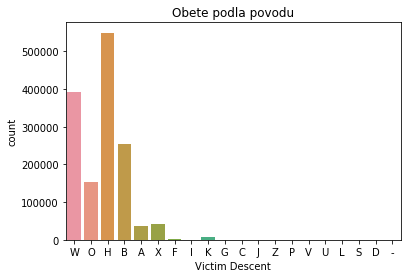

In [101]:
sns.countplot('Victim Descent', data=data).set_title('Obete podla povodu')

In [102]:
df_victims_only['Victim Descent'].unique()

array(['W', 'O', 'H', 'B', 'A', 'F', 'I', 'K', 'G', 'C', 'X', 'J', 'P',
       'V', 'U', 'Z', 'L', 'S', 'D', '-'], dtype=object)